In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='gender', ylabel='count'>

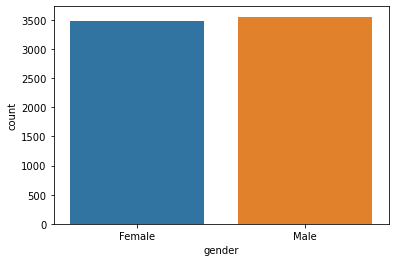

In [14]:

df2=pd.read_csv('churn.csv')
sns.countplot(df['gender'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

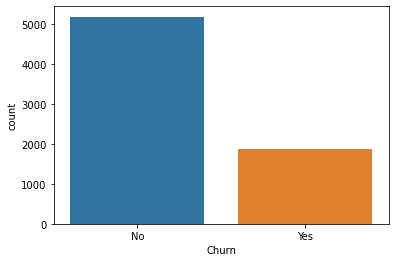

In [15]:
sns.countplot(df['Churn'])

The customer churn rate is low in comparision to the cutomer retention rate. There is an imbalance in the dataset.

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

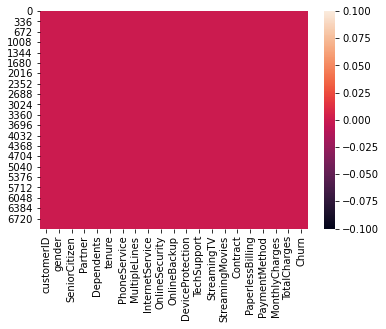

In [7]:
sns.heatmap(df.isnull())

The dataset doesnot contain values. 

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

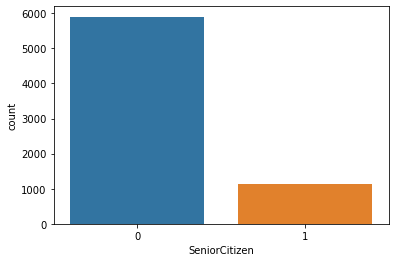

In [4]:
sns.countplot(df['SeniorCitizen'])

The dataset has very less senior cititzen count.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

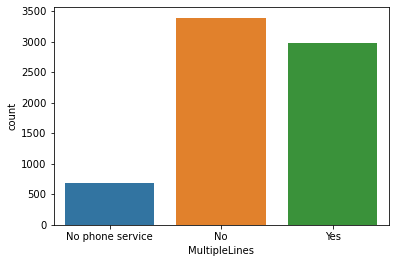

In [5]:
sns.countplot(df['MultipleLines'])

The dataset also has information about people not having a phone service. 

<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

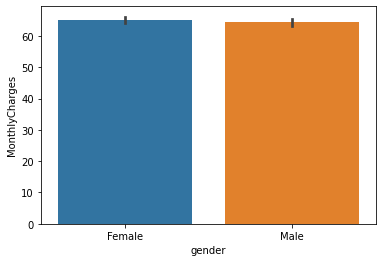

In [11]:
sns.barplot(data=df, y="MonthlyCharges", x="gender")


It is evident that across both genders the money spent is the same.

<AxesSubplot:xlabel='Churn', ylabel='gender'>

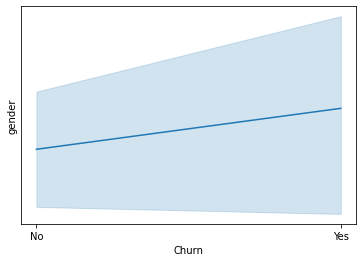

In [12]:
sns.lineplot(data=df, x="Churn", y="gender", hue='')

As seen from the previous plot that both genders spend equal amount of money so the churn factor has found a middle ground so to speak.

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Some intereting insights can be drawn about all the counts of the columns being similar ,the standard deviation values being higher show that the data points are all spread out.

In [17]:
cor=df.corr
cor()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

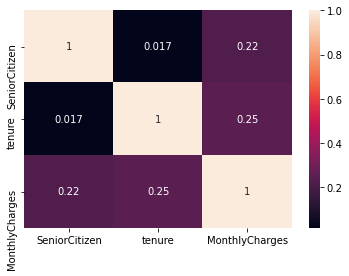

In [18]:
sns.heatmap(cor(), annot=True)

The heatmap shows corelations between senior citizens and tenure with the mostly charges as it can be the deciding factor to understand whether the customer has decided to leave the services or not.

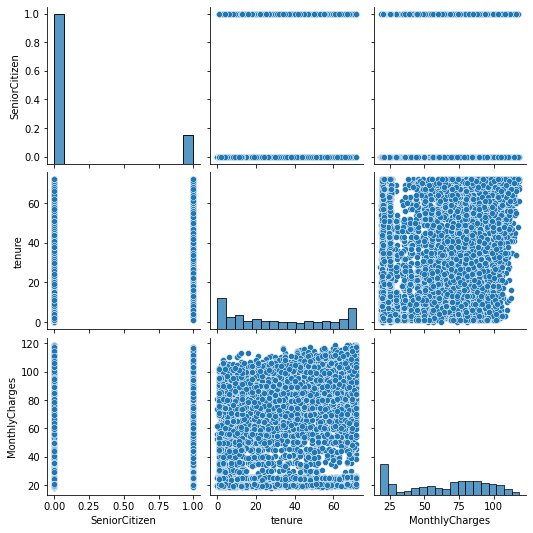

In [20]:
sns.pairplot(df)

<AxesSubplot:>

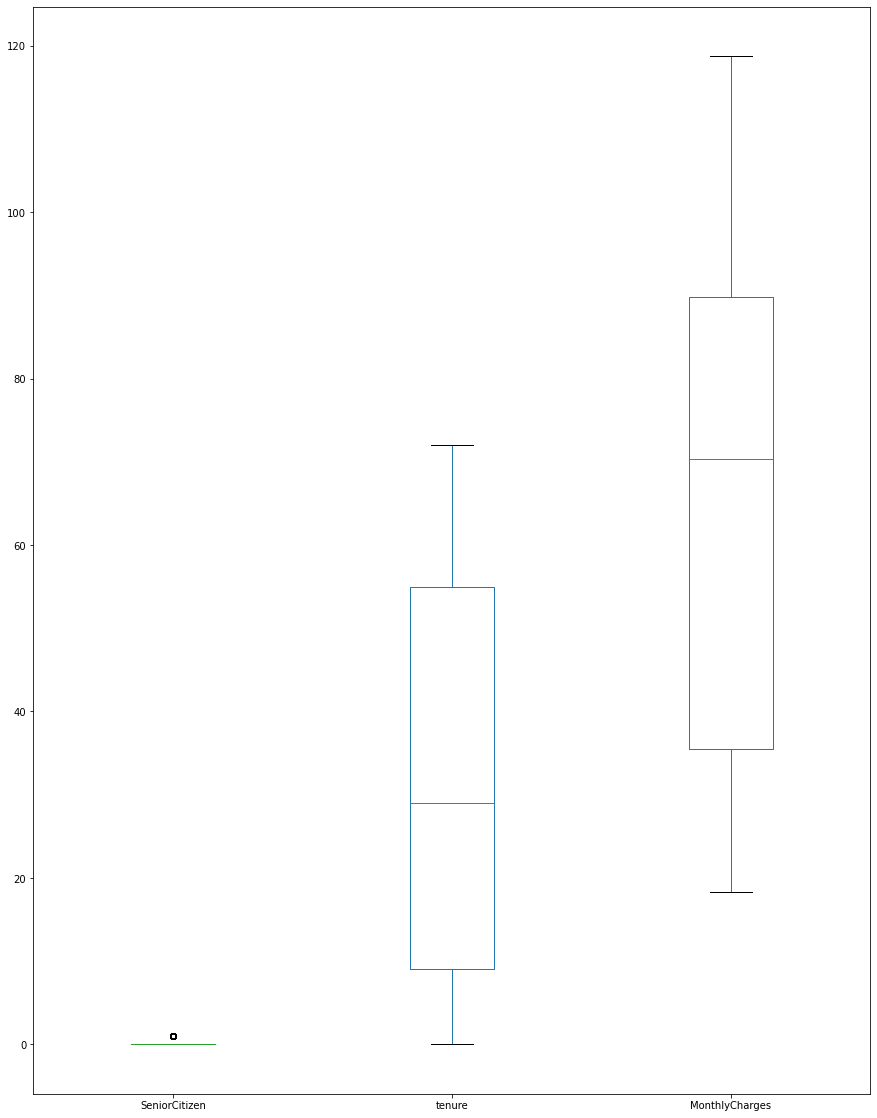

In [23]:
df.plot(kind='box', figsize=(15,20))

It can be obseved from the data that very few outliers are present.

In [24]:
from sklearn.preprocessing import OrdinalEncoder #The encoder helps to convert categorical columns having an object dtype  to float values

enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,6104.0,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1550.0,0.0
7,4770.0,0.0,0,0.0,0.0,10,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,29.75,2609.0,0.0
8,5604.0,0.0,0,1.0,0.0,28,1.0,2.0,1.0,0.0,...,2.0,2.0,2.0,2.0,0.0,1.0,2.0,104.80,2646.0,1.0
9,4534.0,1.0,0,0.0,1.0,62,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.15,3022.0,0.0


##### Splitting the data and Scaling

In [25]:

df.drop(['customerID'], axis=1 , inplace=True)

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


In [27]:
x=df.drop(['Churn'],axis=1)

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(z)
treshhold=3 
print (np.where(z<3))
df_new=df[(z<3).all(axis=1)]
print(df_new)
df_new.shape

[[1.00955867 0.43991649 1.03453023 ... 1.16032292 0.39860759 0.60102348]
 [0.99053183 0.43991649 0.96662231 ... 0.25962894 0.94876238 0.60102348]
 [0.99053183 0.43991649 0.96662231 ... 0.36266036 1.64188328 1.66382851]
 ...
 [1.00955867 0.43991649 1.03453023 ... 1.1686319  0.13968008 0.60102348]
 [0.99053183 2.27315869 1.03453023 ... 0.32033821 0.31653445 1.66382851]
 [0.99053183 0.43991649 0.96662231 ... 1.35896134 1.13801338 0.60102348]]
(array([   0,    0,    0, ..., 7042, 7042, 7042], dtype=int64), array([ 0,  1,  2, ..., 17, 18, 19], dtype=int64))
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1        1.0              0      0.0         0.0      34           1.0   
2        1.0              0      0.0         0.0       2           1.0   
4        0.0              0      0.0         0.0       2           1.0   
5        0.0              0      0.0         0.0       8           1.0   
6        1.0              0      0.0         1.0      22           1.0 

(6361, 20)

It can be seen that after outlier removal 682 rows were removed which amounts only 9.6% of data laving more than 90% of the data intact. So will consider this outlier removal for better prediction. 

In [53]:
#Splitting the data into x and y for further analysis
x=df_new.drop(['Churn'],axis=1)
y=df_new['Churn']

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=22)

In [31]:
from sklearn.preprocessing import MinMaxScaler #for scalling the down the dataset in between 0&1
MM=MinMaxScaler()
MM_fit=MM.fit(x_train)
MM_train=MM_fit.transform(x_train)
MM_test=MM_fit.transform(x_test)
print(MM_train)
print(MM_test)

[[0.         0.         1.         ... 0.66666667 0.66782869 0.52986217]
 [0.         0.         0.         ... 1.         0.51444223 0.64379786]
 [1.         0.         1.         ... 1.         0.01593625 0.33353752]
 ...
 [0.         0.         1.         ... 0.66666667 0.76444223 0.70336907]
 [1.         0.         0.         ... 1.         0.00846614 0.67840735]
 [0.         0.         0.         ... 1.         0.65936255 0.07993874]]
[[0.         0.         1.         ... 0.         0.71812749 0.80290965]
 [1.         0.         0.         ... 1.         0.27639442 0.6388974 ]
 [1.         0.         0.         ... 1.         0.01693227 0.34073507]
 ...
 [1.         0.         1.         ... 0.66666667 0.84810757 0.80704441]
 [1.         0.         0.         ... 1.         0.01543825 0.73215926]
 [0.         0.         1.         ... 0.66666667 0.08615538 0.07013783]]


In [32]:
from imblearn.over_sampling import SMOTE
SM=SMOTE(k_neighbors=2)
x,y= SM.fit_resample(x,y)
# TO BALANCE THE DATASET FORM IMBALANCED VARIABLES.

### Model building

In [33]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report


In [34]:
models=[KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),LogisticRegression(C=5,max_iter=10000, tol=0.1),GaussianNB(),RandomForestClassifier(n_estimators=100,max_features='auto')]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score of',m,':')
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('/n')


accuracy score of KNeighborsClassifier() :
0.7621791513881614
[[1206  180]
 [ 274  249]]
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      1386
         1.0       0.58      0.48      0.52       523

    accuracy                           0.76      1909
   macro avg       0.70      0.67      0.68      1909
weighted avg       0.75      0.76      0.75      1909

/n
accuracy score of DecisionTreeClassifier() :
0.712938711367208
[[1088  298]
 [ 250  273]]
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80      1386
         1.0       0.48      0.52      0.50       523

    accuracy                           0.71      1909
   macro avg       0.65      0.65      0.65      1909
weighted avg       0.72      0.71      0.72      1909

/n
accuracy score of LogisticRegression(C=5, max_iter=10000, tol=0.1) :
0.8072289156626506
[[1251  135]
 [ 233  290]]
              precision    recall  f1-score   

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
gb_pred=gb.predict(x_test)
gb.score(x_train,y_train)
print(gb.score(x_test,y_test))
print(y_pred)
print('accuracy score of',GradientBoostingClassifier,':')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8040859088528025
[0. 0. 0. ... 0. 0. 0.]
accuracy score of <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> :
0.7925615505500262
[[1241  145]
 [ 251  272]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1386
         1.0       0.65      0.52      0.58       523

    accuracy                           0.79      1909
   macro avg       0.74      0.71      0.72      1909
weighted avg       0.78      0.79      0.78      1909



In [37]:
from sklearn.ensemble import AdaBoostClassifier
adf = AdaBoostClassifier(n_estimators=100, random_state=0)
adf.fit(x_train, y_train)
adf_pred=adf.predict(x_test)
print(adf.score(x, y))
print('accuracy score of',AdaBoostClassifier,':')
print(accuracy_score(y_test,adf_pred))
print(confusion_matrix(y_test,adf_pred))
print(classification_report(y_test,adf_pred))

0.7006649506649507
accuracy score of <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> :
0.7930853850183343
[[1243  143]
 [ 252  271]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1386
         1.0       0.65      0.52      0.58       523

    accuracy                           0.79      1909
   macro avg       0.74      0.71      0.72      1909
weighted avg       0.78      0.79      0.78      1909



In [38]:
from sklearn.model_selection import cross_val_score
mod1=[KNeighborsClassifier(),DecisionTreeClassifier(),LogisticRegression(),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(n_estimators=100, random_state=0),GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)]
for i in mod1:
    scores= cross_val_score(i,x,y,cv=5)
    print(scores,i)
    print(scores.mean(), scores.std(),i)

[0.74369973 0.77855228 0.80214477 0.77587131 0.79935622] KNeighborsClassifier()
0.7799248639381422 0.02098512564620711 KNeighborsClassifier()
[0.68793566 0.7152815  0.87131367 0.89597855 0.87553648] DecisionTreeClassifier()
0.8092091728129424 0.08867342224368763 DecisionTreeClassifier()
[0.75764075 0.75067024 0.77426273 0.77211796 0.77521459] LogisticRegression()
0.7659812562565442 0.009954775268819044 LogisticRegression()
[0.76085791 0.75442359 0.78284182 0.77962466 0.77896996] GaussianNB()
0.7713435892715369 0.01144712072359065 GaussianNB()
[0.67399464 0.75281501 0.92171582 0.92761394 0.92972103] RandomForestClassifier()
0.8411720880461171 0.10728995654722896 RandomForestClassifier()
[0.69168901 0.74906166 0.89812332 0.9002681  0.9222103 ] AdaBoostClassifier(n_estimators=100, random_state=0)
0.8322704783163999 0.09352678962012399 AdaBoostClassifier(n_estimators=100, random_state=0)
[0.69115282 0.74048257 0.90402145 0.90241287 0.9248927 ] GradientBoostingClassifier(learning_rate=1.0, 

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

[0.         0.51816444 1.        ] [0.        0.1031746 1.       ] [2. 1. 0.]


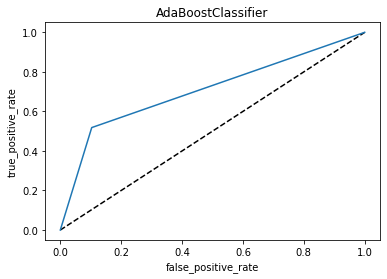

adf: 0.7074949163859298


In [40]:
#auc_roc metrics for AdaBoostClassifier
false_positive_rate , true_positive_rate ,threshold = roc_curve(y_test,adf_pred)
roc_auc= auc(false_positive_rate , true_positive_rate)
tpr=true_positive_rate
fpr=false_positive_rate
print(tpr,fpr,threshold)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title('AdaBoostClassifier')
plt.show()
auc_score=roc_auc_score(y_test,adf_pred)
print('adf:', auc_score)

[0.         0.52198853 1.        ] [0.         0.08946609 1.        ] [2. 1. 0.]


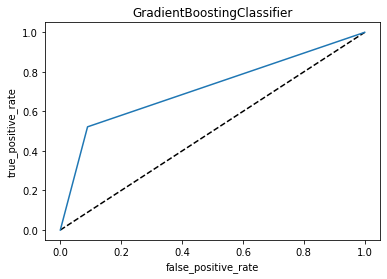

gb: 0.716261219129288


In [44]:
false_positive_rate , true_positive_rate ,threshold = roc_curve(y_test,gb_pred)
roc_auc= auc(false_positive_rate , true_positive_rate)
tpr=true_positive_rate
fpr=false_positive_rate
print(tpr,fpr,threshold)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title('GradientBoostingClassifier')
plt.show()
auc_score=roc_auc_score(y_test,gb_pred)
print('gb:', auc_score)

As Gradient boosting has the highest roc scores of 71.6% , it can be used to predict the model.

#### Checking the prediction with the best fit model.

In [50]:
x_predict = list(gb.predict(x_test))
df = {'predicted':x_predict,'orignal':y_test}
pd.DataFrame(df).head(25)

,predicted,orignal
759,0.0,0.0
4298,0.0,0.0
6842,0.0,0.0
5641,0.0,0.0
310,0.0,0.0
864,1.0,1.0
5676,0.0,0.0
6512,0.0,0.0
3872,1.0,0.0
1712,0.0,0.0


##### Model Saving

In [51]:
import joblib
joblib.dump(gb,'gb_file.obj')

['gb_file.obj']

### Final thoughts and findings on the dataset

The IBM  churn dataset had very less amount of outliers with a fair amount of categorical columns and a very vivid and concise data of a telecom company's customerbase.Ensemble techniques along boosting were used to find the best fitting model. It was interesting to observe the information collected by the company. On observing the count of churn it could be seen that the company was doing a good job as the number of people leaving the companies telecom service was low so it is fairly right to say that the data collected by the company is faily sufficient and they doing their work in the right way.